In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

In [3]:
circuit = QuantumCircuit(q,c)

In [4]:
# circuit.ry(-90*pi/180, q)
circuit.u3(pi/2, 0, 0, q)
circuit.draw()

C:\Users\wei\AppData\Local\Temp/ipykernel_12960/2304084990.py:2: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(pi/2, 0, 0, q)


┌─────────────┐
q0_0: ┤ U3(π/2,0,0) ├
      ├─────────────┤
q0_1: ┤ U3(π/2,0,0) ├
      └─────────────┘
c0: 2/═══════════════

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


C:\Users\wei\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


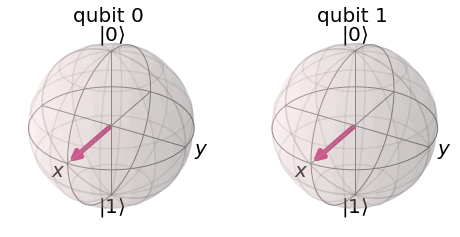

In [5]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [13]:
circuit.measure(q,c)
circuit.draw()

┌──────────────┐┌─┐┌─┐
q14_0: ┤ U3(-π/2,0,0) ├┤M├┤M├
       └──────────────┘└╥┘└╥┘
 c1: 1/═════════════════╩══╩═
                        0  0

{'0': 494, '1': 530}


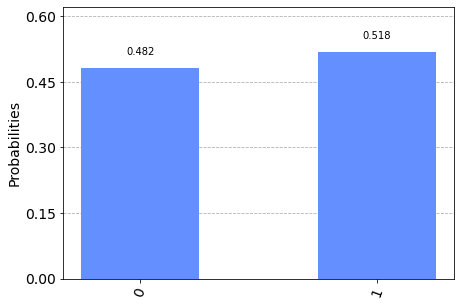

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)